# Capstone Project

## Data Gathering

In [3]:
# Import libraries
from collections import Counter
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from scipy import interp
import seaborn as sns
from sklearn import svm, neighbors, model_selection
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.svm import SVC

from nltk.classify.scikitlearn import SklearnClassifier

import warnings
warnings.filterwarnings("ignore")

In [4]:
# df_funda = pd.read_csv('./data/fundamentals.csv', index_col=0)

In [5]:
# df_prices = pd.read_csv('./data/prices.csv')

In [6]:
# Reading data from csv
df = pd.read_csv('./data/all_stocks_5yr.csv')

## Data exploration

In [7]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [9]:
# Checking for missing values

df.isnull().values.any()

True

In [10]:
df.shape

(619040, 7)

The data set contains 619 040 rows of data. Each row contains a set of prices for a certain stock ticker, for a certain day. I will be focusing on closing prices for each day, and ignore intra-day fluctations. To organize the data frame I will privot the dataframe using date as index, with one column for each stock ticker. 

In [11]:
df = df.pivot(index='date', columns='Name', values='close')

In [12]:
df.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [13]:
df.shape

(1259, 505)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2013-02-08 to 2018-02-07
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 4.9+ MB


In [15]:
df.describe()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,49.202025,38.393252,132.433463,109.066698,60.86444,82.092979,42.940326,101.119079,90.458156,60.931932,...,35.315099,49.833474,87.668447,53.821882,40.486807,41.434095,75.451009,105.606291,32.171790,45.098648
std,9.229804,10.957636,31.274463,30.556812,13.73038,16.315690,5.860169,22.129031,36.997773,13.383631,...,3.874693,9.517797,6.959475,7.599269,7.949466,11.319674,7.485003,15.052699,7.673401,11.981390
min,33.370000,13.020000,76.180000,55.789900,35.27000,46.180000,32.930000,70.280000,38.110000,42.340000,...,27.960000,35.510000,68.710000,40.240000,27.520000,24.190000,59.700000,72.380000,19.900000,28.400000
25%,41.560000,34.330000,104.440000,84.830650,52.65000,70.525000,38.475000,80.670000,65.865000,50.272500,...,32.175000,43.222500,82.435000,47.015000,34.400000,34.590000,70.225000,96.075000,27.505000,32.830000
50%,46.700000,40.870000,141.300000,109.010000,60.17000,82.560000,42.300000,97.770000,80.590000,56.930000,...,35.010000,46.860000,87.290000,53.540000,40.000000,37.280000,74.100000,105.970000,29.230000,45.620000
75%,56.495000,46.535000,156.730000,127.120000,65.74500,92.520000,45.785000,117.045000,105.710000,67.895000,...,37.770000,54.060000,92.085000,60.805000,45.480000,49.155000,80.470000,117.315000,32.462500,51.295000
max,74.820000,58.470000,200.380000,179.260000,123.21000,115.480000,63.420000,162.550000,201.300000,97.240000,...,46.660000,76.300000,104.380000,68.580000,57.280000,75.660000,94.880000,133.090000,54.980000,80.090000


In [16]:
def get_df():
    df = pd.read_csv('./data/all_stocks_5yr.csv')
    df = df.pivot(index='date', columns='Name', values='close')
    
    return df

## Visual exploration

In [17]:
def stock_visualization(ticker):
    '''
    Function for visualizing stock price over time.
    
    INPUT: ticker, string
    
    OUTPUT: plot of stock price over time
    '''
    fig,ax1 = plt.subplots(figsize=(10, 5))
    df[ticker].plot()
    plt.show()
    

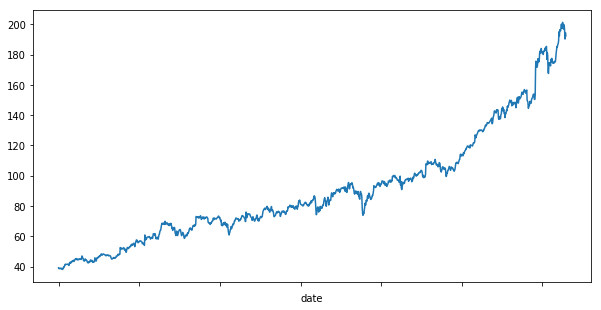

In [18]:
# Visualizing Adobe stock price development
stock_visualization('ADBE')

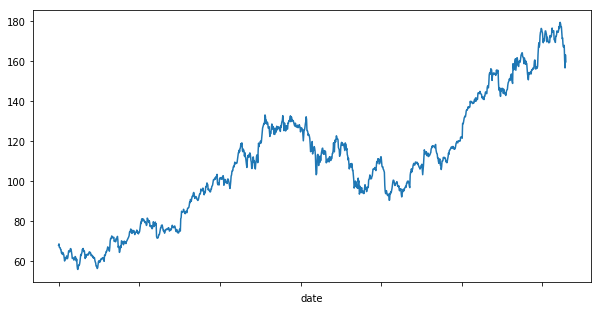

In [19]:
# Apple
stock_visualization('AAPL')

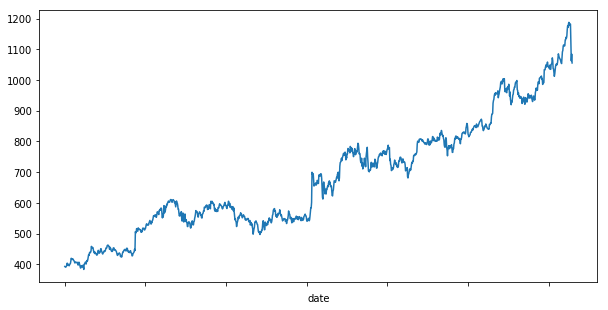

In [20]:
# Google
stock_visualization('GOOGL')

In [35]:
def stock_heatmap(df):
    '''
    The function takes a dataframe as input, gets the
    correlation between stocks and plots a heatmap of 
    stock price correlation.
    
    INPUT:
    df - dataframe 
    OUTPUT:
    heatmap of correlation
    '''
    
    df = df
    
    # Getting pairwise correlation of columns
    df_corr = df.corr()
    data = df_corr.values

    # Setting up heatmap of stock correlation
    ax = sns.heatmap(data, cmap='coolwarm')

    # Various adjustments and graph set-up
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    fig = ax.get_figure()
    plt.tight_layout()
    plt.show()
    fig.savefig('heatmap.png')
    

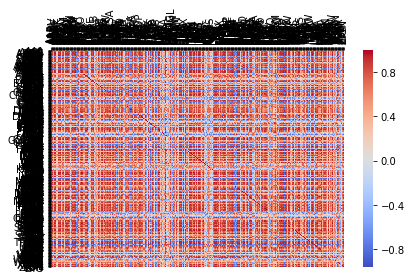

In [36]:
stock_heatmap(df)

## Data preprocessing

The heatmap reveals correlation between groups of companies. We know that stocks in general have tended to increase in value over time, but the heatmap reveals both positive and negative correlation, of different strength. If we infer from this that the price of groups of companies tend to move together, can we gain an edge by studying this relationship using machine learning? The assumption that certain companies move together makes a lot of sense. For instance, we expect the profits (and thus share price) of companies in the oil industry to be linked to the oil price, and we expect retail companies to linked to eg. the disposable income of consumers or the unemployment rate. There might also be relationships that are less obvious to a human, but might be revealed using machine learning. In most cases, we would not expect the stock prices to move simultaneously for all companies. Some companies will lead, some will lag. It is this relationship I want to study more closely, which might give us an edge in deciding whether to buy, sell or hold a certain stock.

Prepare data for analysis:
- Normalize data: Convert stock prices to percentage change. These changes will be our features, determining our labels (buy, sell, hold).
- Issue? We're training data on 5 years of data, checking correlation. Too long period might be a problem due to companies' relationships to changing over time
- On average, stocks increase over time. Is our strategy better than a simply buying? -> buy and  hold

In [44]:
def preprocessing_data(ticker):
    '''
    Function adds number_of_days amounts of columns
    containing percentage change in price for a stock.
    
    INPUT:
    ticker - stock ticker
    
    OUTPUT:
    tickers - list of stock tickers
    df - updated data frame with new columns
    '''
    # Period for measuring change
    number_of_days = 5
    
    df = get_df()
    
    tickers = df.columns.values.tolist()
    
    # Dealing with missing values
    df.fillna(0, inplace=True)
    
    for i in range(1, number_of_days + 1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
        
    df.fillna(0, inplace=True)
    
    return tickers, df

## Implementation

In [45]:
def buy_sell_hold(*args):
    '''
    Function for labelling buy, sell or hold
    based on price change in percent.
    '''
    # Passing number_of_days number of prices
    cols = [c for c in args]
    
    # Required change in price of number_of_days
    requirement = 0.02
    
    # If change > requirement, return 1 (buy),
    # if price down > negative requirement, return -1 (sell),
    # else 0 (hold)
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    
    return 0

In [46]:
def get_features(ticker):
    '''
    Function for defining a new column in the data set,
    containing labels for buy, sell or hold, and getting
    sets of features and labels.
    
    INPUT:
    ticker - stock ticker
    
    OUTPUT:
    X - feature set, here percentage change in price
    y - labels (buy, sell, hold)
    df - updated data frame
    '''
    
    tickers, df = preprocessing_data(ticker)
    
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)]))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    
    # Print distribution of buy, sell, hold
    print('Data spread:', Counter(str_vals))
   
    # Handle any infinite changes in percentage, replace with NaN
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    
    # Dropping the NaNs
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    # Getting features
    X = df_vals.values
    
    # Getting labels
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df

In [47]:
X, y, df = get_features('GOOGL')

Data spread: Counter({'0': 498, '1': 423, '-1': 338})


In [48]:
df.GOOGL_target.value_counts()

 0    498
 1    423
-1    338
Name: GOOGL_target, dtype: int64

In [97]:
def ml_svm(ticker):
    '''
    Baseline out-of-the-box SVM as a benchmark.
    
    INPUT:
    ticker - stock price ticker
    
    OUTPUT:
    Data spread, accuracy, prediction spread
    '''
    X, y, df = get_features(ticker)
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.2)

    clf = svm.LinearSVC()
    #clf = SVC(probability=True)
    
    clf.fit(X_train, y_train)
    
    confidence = clf.score(X_test, y_test)
    print('Accuracy:', confidence)
    
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return predictions

In [50]:
def ml_vote(ticker):
    '''
    Voting on three different classifiers:
    k-nearest neighors, linear svc and random forest.
    
    INPUT:
    ticker - stock price ticker
    
    OUTPUT:
    Data spread, accuracy, prediction spread
    '''
    X, y, df = get_features(ticker)
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.2)
    
    clf_A = neighbors.KNeighborsClassifier()
    clf_B = svm.LinearSVC()
    clf_C = RandomForestClassifier()

    clf = VotingClassifier(estimators=[('knn', clf_A), 
                                       ('lsvc', clf_B), 
                                       ('rf', clf_C)], voting='hard')
    clf.fit(X_train, y_train)
    
    confidence = clf.score(X_test, y_test)
    print('Accuracy:', confidence)
    
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return

In [76]:
def ml_rf(ticker):
    '''
    Voting on three different classifiers:
    k-nearest neighors, linear svc and random forest.
    
    INPUT:
    ticker - stock price ticker
    
    OUTPUT:
    Data spread, accuracy, prediction spread
    '''
    X, y, df = get_features(ticker)
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.2)
    
    clf = RandomForestClassifier()

    clf.fit(X_train, y_train)
    
    confidence = clf.score(X_test, y_test)
    print('Accuracy:', confidence)
    
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return clf, X_train, X_test, y_train, y_test

In [99]:
predictions = ml_svm('BAC')

Data spread: Counter({'1': 480, '-1': 395, '0': 384})
Accuracy: 0.32936507936507936
Predicted spread: Counter({1: 177, -1: 44, 0: 31})


In [105]:
print(precision_score(y_test, predictions, average='weighted'))
print(recall_score(y_test, predictions, average='weighted'))
print(f1_score(y_test, predictions, average='weighted'))

0.3992329633390322
0.3968253968253968
0.3591178255489209


In [52]:
ml_vote('BAC')

Data spread: Counter({'1': 480, '-1': 395, '0': 384})
Accuracy: 0.30952380952380953
Predicted spread: Counter({1: 148, -1: 84, 0: 20})


In [77]:
# Test random forest

model, X_train, X_test, y_train, y_test = ml_rf('GOOGL')

Data spread: Counter({'0': 498, '1': 423, '-1': 338})
Accuracy: 0.38492063492063494
Predicted spread: Counter({0: 133, -1: 66, 1: 53})


## Refinement

## Evaluation